In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import preprocessing as preproc # load preprocessing function
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import tree
from sklearn import ensemble


# Todo

## Time series
1. Gennemsnittet for de sidste N observationer per destination
2. Gennemsnittet for de sidste N søndage (og lørdage, mandage etc) eller bare delt op på hverdag/weekend
3. Kombi af 1. og 2. 




## Categorical
1. Tidspunkt på dagen 
2. Weekend/hverdag i stedet for ugedage

## "Weighted least squares "
1. Optimer den procentvise andel af data der bliver brugt (MSE) 

## Include more 
- Seatcapacity 
- Airline type 
- etc.

## Model parametre i Random forrest/regression trees
- m: number of variables to consider in each split. Good idea to tune it. But we can also use floor(p/3) for regression. When we use a subset to choose from in each split, we obtain the bagging variance, which is nice and which gives us the uncorrelated trees
- When there is too many variables that are not important, it lowers the performance 

## BIC og AIC for decision tree
- oob

## Feature selection 




In [6]:
# read data
df = pd.read_excel("data/realised_schedule.xlsx")

df_new = pd.read_excel("data/updated_data.xlsx")


In [12]:
df

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
1,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
2,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
3,2021-01-01 13:20:00,CN,514,EST,AT7,J,US,72,0.333333
4,2021-01-01 14:20:00,LJ,3140,DEN,32A,J,US,186,0.204301
...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 18:30:00,VW,986,YYZ,320,J,CA,180,0.522222
36766,2022-02-08 19:30:00,LJ,579,YQU,319,J,CA,156,0.532051
36767,2022-02-08 19:40:00,LJ,506,YUL,319,J,CA,156,0.602564
36768,2022-02-08 19:05:00,CL,2708,DAN,73H,J,US,189,0.417989


In [11]:
df_new[df_new['ScheduleTime'] > '2022-02-08']

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
35925,2022-02-08 06:45:00,UK,1315,YXX,32A,J,CA,180,0.344444
35926,2022-02-08 07:10:00,VW,770,YYZ,320,J,CA,180,0.361111
35927,2022-02-08 07:30:00,NV,1256,YCD,320,J,CA,180,0.261111
35928,2022-02-08 07:00:00,DO,634,YYJ,32N,J,CA,180,0.188889
35929,2022-02-08 07:20:00,SV,1527,CKE,73H,J,US,189,0.619048
...,...,...,...,...,...,...,...,...,...
39444,2022-02-28 18:45:00,VW,986,YYZ,319,J,CA,144,0.847222
39445,2022-02-28 19:25:00,LJ,667,YDQ,319,J,CA,156,0.871795
39446,2022-02-28 20:00:00,VW,3406,MYV,E90,J,US,98,0.857143
39447,2022-02-28 19:30:00,LJ,663,RUT,32N,J,US,186,0.682796


## Data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


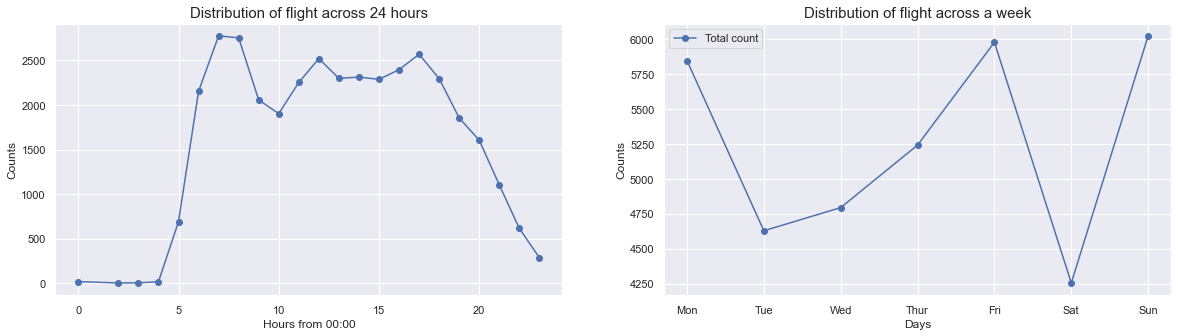

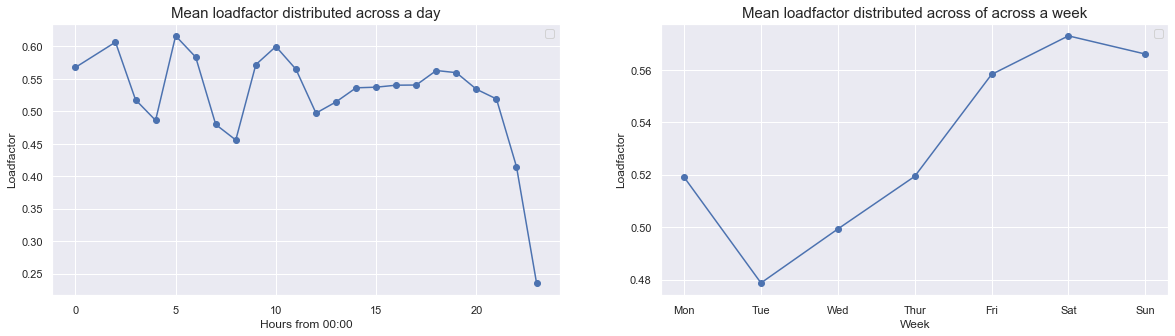

In [3]:
data = df


fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(data.groupby(data["ScheduleTime"].dt.hour).count().LoadFactor, 'o-')
ax[0].set_title('Distribution of flight across 24 hours', fontsize = 15)
ax[0].set_xlabel('Hours from 00:00')
ax[0].set_ylabel('Counts')

ax[1].plot(data.groupby(data["ScheduleTime"].dt.weekday).count().LoadFactor, 'o-', label = 'Total count')
ax[1].set_title('Distribution of flight across a week', fontsize = 15)
ax[1].set_xlabel('Days')
ax[1].set_xticks(np.arange(0,7), ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
ax[1].set_ylabel('Counts')
ax[1].legend()

################################

fig, ax = plt.subplots(1,2, figsize = (20,5))


ax[0].plot(data.groupby(data["ScheduleTime"].dt.hour).mean().LoadFactor, 'o-')
ax[0].set_title('Mean loadfactor distributed across a day', fontsize = 15)
ax[0].set_xlabel('Hours from 00:00')
#ax[1].set_xticks(np.arange(0,7), ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
ax[0].set_ylabel('Loadfactor')
ax[0].legend()


ax[1].plot(data.groupby(data["ScheduleTime"].dt.weekday).mean().LoadFactor, 'o-')
ax[1].set_title('Mean loadfactor distributed across of across a week', fontsize = 15)
ax[1].set_xlabel('Week')
ax[1].set_xticks(np.arange(0,7), ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
ax[1].set_ylabel('Loadfactor')
ax[1].legend()




plt.show()


## Analysing data

The plots above indicates that both day of week and time of day is important features to include

In [4]:
# choose rows of interrest
data = df #[df['ScheduleTime'] > '2021-11-01']

## Modify features 

# Choose which features to use 
data = data[['ScheduleTime','LoadFactor', 'Destination', 'FlightType']]

# Weekday features
data['weekday']=data['ScheduleTime'].dt.day_of_week 
data['week_day'] = data.weekday.apply(lambda x: str(x)) # string formatting nessesary for one-hot-encoding

# Mean Loadfactor per day
data['hour_of_day'] = data['ScheduleTime'].dt.hour 
#data['hour_of_day'] = data.hour_of_day.apply(lambda x: str(x))


# Hours from first observation 
time = (data.ScheduleTime - data.ScheduleTime.iloc[0]) /pd.Timedelta('1 hour') # substract time for first obs. and divide by hour
min_ = time.min() 
max_ = time.max()
time =  (time - min_) / (max_ - min_) # min-max normalisation 
data['time'] = time

# polynomial features
#for i in range(2,8):
#    data[f'time_{i}'] = time**i

# One hot encoding 
#data = pd.get_dummies(data).drop(['weekday'], axis = 1)

# split into val and training data
val_data = data[data['ScheduleTime'] >='2022-02-01']
train_data = data[data['ScheduleTime'] < '2022-02-01']

# Seperate X and y
y_val = val_data.LoadFactor.values
X_val = val_data.drop(["LoadFactor", 'ScheduleTime'], axis = 1).values

y_train = train_data.LoadFactor.values
X_train = train_data.drop(["LoadFactor", 'ScheduleTime'], axis = 1).values

# look at data
data.head()

,ScheduleTime,LoadFactor,Destination,FlightType,weekday,week_day,hour_of_day,time
0,2021-01-01 06:35:00,0.408451,DEN,J,4,4,6,0.000052
1,2021-01-01 10:35:00,0.189189,YHM,J,4,4,10,0.000464
2,2021-01-01 12:05:00,0.570423,DEN,J,4,4,12,0.000619
3,2021-01-01 13:20:00,0.333333,EST,J,4,4,13,0.000748
4,2021-01-01 14:20:00,0.204301,DEN,J,4,4,14,0.000851


In [5]:
model = tree.DecisionTreeRegressor(min_samples_leaf = 1)#, ccp_alpha = n)
model.fit(X_train,y_train)
yhat = model.predict(X_val)
yhat_train = model.predict(X_train)


model_err = np.mean(abs(y_val - yhat))
print(f'Model absolute error: {model_err}')

baseline_err = abs(y_val - train_data[train_data['ScheduleTime']>'2022-01-01'].LoadFactor.mean()).mean()
print(f'Baseline error: {baseline_err}')

fig, ax = plt.subplots(2,1, figsize = (20,10))
plt.title('Validation data')
ax[0].scatter(val_data.ScheduleTime, y_val - yhat)
ax[0].set_title('Residuals',fontsize = 20)

ax[1].plot(val_data.ScheduleTime, y_val,'.', label = 'y_val')
ax[1].plot(val_data.ScheduleTime, yhat,  '.', label = 'y_hat_val',)
ax[1].set_title('Prediction',fontsize = 20 )
ax[1].legend()


fig, ax = plt.subplots(2,1, figsize = (20,10))
plt.title('Training data')
ax[0].scatter(train_data.ScheduleTime, y_train - yhat_train)
ax[0].set_title('Residuals',fontsize = 20)

ax[1].plot(train_data.ScheduleTime, y_train,'.', label = 'y_train')
ax[1].plot(train_data.ScheduleTime, yhat_train,  '.', label = 'y_hat_train')
ax[1].set_title('Prediction',fontsize = 20 )
ax[1].legend()

plt.show()

ValueError: could not convert string to float: 'DEN'

In [ ]:
# random forrest
forest = ensemble.RandomForestRegressor(n_estimators = 10)
forest.fit(X_train,y_train)
yhat = forest.predict(X_val)


model_err = np.mean(abs(y_val - yhat))
print(f'Forest absolute error: {model_err}')


Forest absolute error: 0.15178287108583058


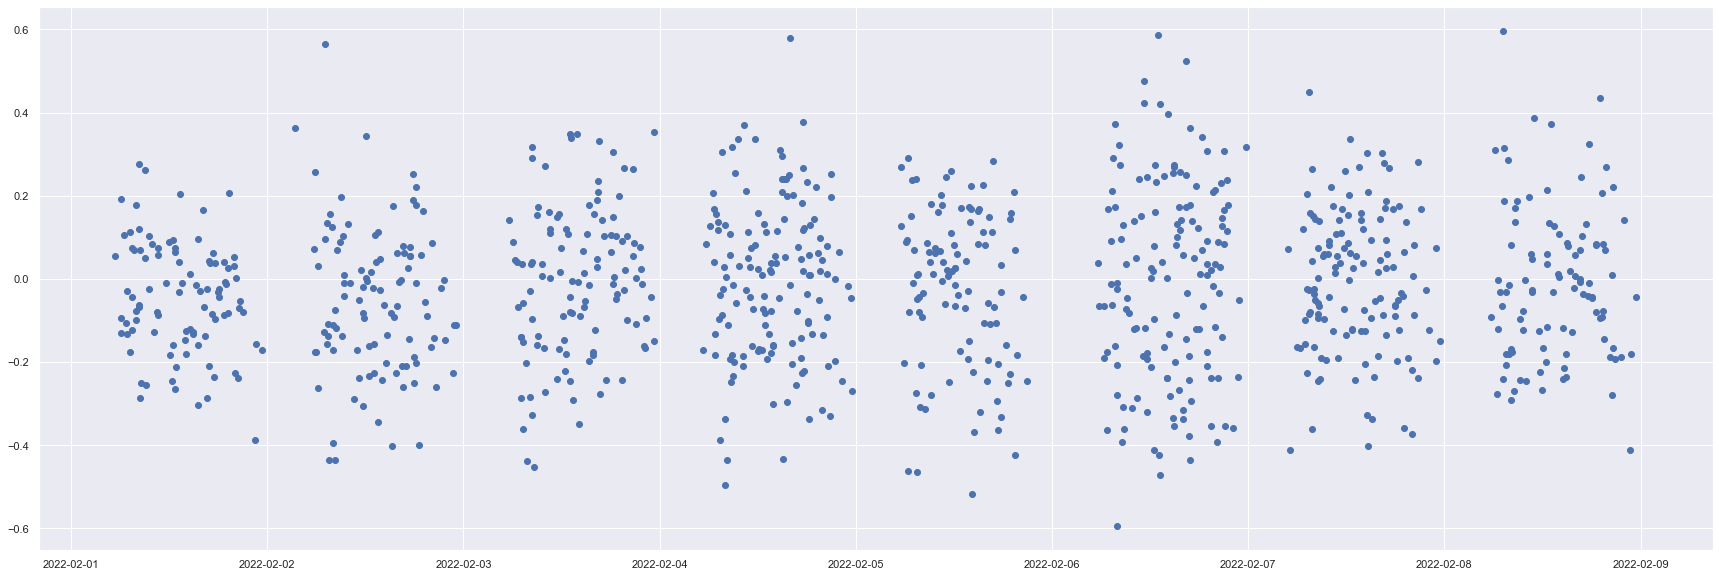

In [11]:
fig, ax = plt.subplots(1,1, figsize = (30,10))
ax.scatter(val_data.ScheduleTime, y_val - yhat)

In [41]:
#n_leafs = np.arange(1,30)
#ccps = np.linspace(0,0.5, 10)

#err = []
#for n in ccps:
#    model = tree.DecisionTreeRegressor(min_samples_leaf = 10, ccp_alpha = n)
#    model.fit(X_train,y_train)
#    yhat = model.predict(X_val)

#    err.append(np.mean(abs(y_val - yhat)))

0.2045481363147706


array([[5.16026937e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.64424243e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.19232324e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.79625536e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.79694340e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.79823347e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])